In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use("seaborn-whitegrid")
plt.rc('ps',fonttype = 42)
plt.rc('pdf',fonttype = 42)
plt.rcParams.update({'font.size': 20})
plt.rcParams['ps.useafm'] = True
#plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['axes.unicode_minus'] = False

In [2]:
texts_df = pd.read_pickle("data/processed/texts.p")

In [3]:
texts_df.head()

,nde,ndf,text,places,persons,works,filename,title,volume,issue,author,country,language,date,topics
0,E1,NaN,N°. xv . Le Lundi 18. de Juin 1714. Avertissem...,"{Groningue, la Haye, Amsterdam, Montpellier}","{Jaques Fabre, Henri Scheurleer, Jean Wolters,...",{},mws.6497.xml,N°. XV.,1,015,Anonym [Jean Rousset de Missy / Nicolas de Gue...,Frankreich,French,1715\n [1714],{Manners and Customs}
1,E2,NaN,A la vérité on se lasse d’entendre un donneur ...,{},{},{},mws.6497.xml,N°. XV.,1,015,Anonym [Jean Rousset de Missy / Nicolas de Gue...,Frankreich,French,1715\n [1714],{Manners and Customs}
2,E2,MT,Em Boileau pour entamer ce Discours-ci. Il me ...,"{la Haïe, Paris}","{Boileau, Démoclés, Lucette, Censeur}",{},mws.6497.xml,N°. XV.,1,015,Anonym [Jean Rousset de Missy / Nicolas de Gue...,Frankreich,French,1715\n [1714],{Manners and Customs}
3,E3,NaN,"C’est à vous mon Esprit à qui je veux parler, ...",{},"{Horace, Saurin}",{},mws.6497.xml,N°. XV.,1,015,Anonym [Jean Rousset de Missy / Nicolas de Gue...,Frankreich,French,1715\n [1714],{Manners and Customs}
4,E3,AE,Démoclés âgé de soixante-&-dix ans vivoit heur...,"{Meaux, France, Paris}","{Démoclés, Lucette, Nigaudinet}",{},mws.6497.xml,N°. XV.,1,015,Anonym [Jean Rousset de Missy / Nicolas de Gue...,Frankreich,French,1715\n [1714],{Manners and Customs}


In [4]:
texts_reduced=texts_df[['filename','title','volume','issue','author','language','date']]

In [5]:
texts_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18918 entries, 0 to 18917
Data columns (total 7 columns):
filename    18918 non-null object
title       18907 non-null object
volume      18918 non-null object
issue       18918 non-null object
author      18918 non-null object
language    18918 non-null object
date        18918 non-null object
dtypes: object(7)
memory usage: 1.0+ MB


In [6]:
texts_reduced=texts_reduced.drop_duplicates()

In [7]:
texts_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3477 entries, 0 to 18911
Data columns (total 7 columns):
filename    3477 non-null object
title       3475 non-null object
volume      3477 non-null object
issue       3477 non-null object
author      3477 non-null object
language    3477 non-null object
date        3477 non-null object
dtypes: object(7)
memory usage: 217.3+ KB


In [8]:
texts_reduced['topics']=texts_df['topics'][texts_reduced.index]

In [9]:
texts_reduced.head()

,filename,title,volume,issue,author,language,date,topics
0,mws.6497.xml,N°. XV.,1,015,Anonym [Jean Rousset de Missy / Nicolas de Gue...,French,1715\n [1714],{Manners and Customs}
7,mws.6948.xml,Chapitre I.,3,001,Jean-François de Bastide,French,1760-1761,{Autopoetical Reflection}
17,mws.2983.xml,XXVI. Discours,1,027,Justus Van Effen,French,1711-1712,"{Idea of Man, Theatre Literature Arts}"
23,mws.372.xml,Discurso XI,1,11,Anónimo (Francisco del Valle-Inclán),Spanish; Castilian,1800,"{Politics, Manners and Customs}"
27,mws.7053.xml,Lezione CCXX,4,220,Cesare Frasponi,Italian,1728,{Idea of Man}


In [10]:
topics_count = pd.Series()
for topics in texts_reduced["topics"]:
    for topic in topics:
        if topic not in topics_count:
            topics_count[topic] = 1
        else:
            topics_count[topic] += 1

In [11]:
for topic in topics_count.index:
    texts_reduced[topic]=0

In [12]:
for row in range(len(texts_reduced)):
    for topic in texts_reduced['topics'].iloc[row]:
        texts_reduced.loc[texts_reduced.index[row],topic]=1

In [13]:
texts_reduced

,filename,title,volume,issue,author,language,date,topics,Manners and Customs,Autopoetical Reflection,...,America (West India),France,Superstition,Passion,Italy,Switzerland,Germany,Friendship,Austria,Apologetic of Spain
0,mws.6497.xml,N°. XV.,1,015,Anonym [Jean Rousset de Missy / Nicolas de Gue...,French,1715\n [1714],{Manners and Customs},1,0,...,0,0,0,0,0,0,0,0,0,0
7,mws.6948.xml,Chapitre I.,3,001,Jean-François de Bastide,French,1760-1761,{Autopoetical Reflection},0,1,...,0,0,0,0,0,0,0,0,0,0
17,mws.2983.xml,XXVI. Discours,1,027,Justus Van Effen,French,1711-1712,"{Idea of Man, Theatre Literature Arts}",0,0,...,0,0,0,0,0,0,0,0,0,0
23,mws.372.xml,Discurso XI,1,11,Anónimo (Francisco del Valle-Inclán),Spanish; Castilian,1800,"{Politics, Manners and Customs}",1,0,...,0,0,0,0,0,0,0,0,0,0
27,mws.7053.xml,Lezione CCXX,4,220,Cesare Frasponi,Italian,1728,{Idea of Man},0,0,...,0,0,0,0,0,0,0,0,0,0
33,mws.4223.xml,No. 6,1,006,Jean-François de Bastide,French,1760,"{Autopoetical Reflection, Idea of Man, Law, Th...",0,1,...,0,0,0,0,0,0,0,0,0,0
39,mws.6950.xml,Chapitre III.,3,003,Jean-François de Bastide,French,1760-1761,{Theatre Literature Arts},0,0,...,0,0,0,0,0,0,0,0,0,0
42,mws-109-730.xml,Número 25,1,25,Bachiller D. P. Gatell.,Spanish; Castilian,1790,"{Nature, Manners and Customs, Science}",1,0,...,0,0,0,0,0,0,0,0,0,0
48,mws-112-829.xml,Jueves 23. de Febrero de 1736,1,12,Frai Manuel de San Josef,missing,1735-1736,{Politics},0,0,...,0,0,0,0,0,0,0,0,0,0
51,mws-117-1147.xml,Il sepolcro solitario,4,69,Giovanni Ferri di S. Costante,Italian,1822,"{Idea of Man, Happiness}",0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
texts_corrected=texts_reduced
texts_corrected.loc[texts_corrected.date=='1715\n                        [1714]','date']=1715
texts_corrected.loc[texts_corrected.date=='1760-1761','date']=1760
texts_corrected.loc[texts_corrected.date=='1762-1763','date']=1762
texts_corrected.loc[texts_corrected.date=='1763-1763','date']=1763
texts_corrected.loc[texts_corrected.date=='1711-1712','date']=1711
texts_corrected.loc[texts_corrected.date=='1723-1725','date']=1723
texts_corrected.loc[texts_corrected.date=='1735-1736','date']=1735
texts_corrected.loc[texts_corrected.date=='1779-1780','date']=1779
texts_corrected.loc[texts_corrected.date=='1786-1788','date']=1786
texts_corrected.loc[texts_corrected.date=='1795-1796','date']=1795
texts_corrected.loc[texts_corrected.date=='1803-1804','date']=1803
texts_corrected.loc[texts_corrected.date=='1787\n                    bzw.1788','date']=1787
texts_corrected.loc[texts_corrected.date=='1750\n                        [1749-1751]','date']=1750
texts_corrected.loc[texts_corrected.date=='1724\n                        [1723-1724]','date']=1724
texts_corrected.loc[texts_corrected.date=='1750 [1749-1751]','date']=1750
texts_corrected.loc[texts_corrected.date=='1724 [1723-1724]','date']=1724
texts_corrected.loc[texts_corrected.date=='1787 bzw.1788','date']=1787
texts_corrected.loc[texts_corrected.date=='1715 [1714]','date']=1715

texts_corrected = texts_corrected.drop(texts_corrected[texts_corrected.date=='missing'].index)
texts_corrected = texts_corrected.drop(texts_corrected[texts_corrected.date=='4-192'].index)

In [112]:
from datetime import datetime
for row in range(len(texts_corrected)):
    try:
        texts_corrected.loc[texts_corrected.index[row],'date']=datetime.strptime(str(texts_corrected.loc[texts_corrected.index[row],'date']), '%Y').year
    except ValueError:
        texts_corrected.loc[texts_corrected.index[row],'date']=datetime.strptime(str(texts_corrected.loc[texts_corrected.index[row],'date']), '%Y-%m-%d').year

In [175]:
relevant_topics=['Manners and Customs','Autopoetical Reflection','Idea of Man','Love','Image of Women','Theatre Literature Arts']
texts_changes=texts_corrected[['date','language']+relevant_topics]

,date,language,Manners and Customs,Autopoetical Reflection,Idea of Man,Love,Image of Women,Theatre Literature Arts
0,1715,French,1,0,0,0,0,0
7,1760,French,0,1,0,0,0,0
17,1711,French,0,0,1,0,0,1
23,1800,Spanish; Castilian,1,0,0,0,0,0
27,1728,Italian,0,0,1,0,0,0


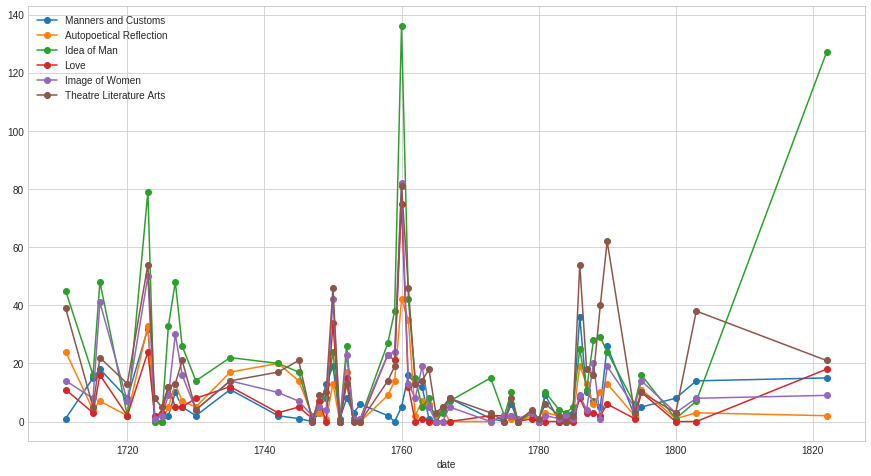

In [179]:
topics_year=texts_changes.groupby('date').sum()
topics_year.plot(figsize=(15,8),marker='o')

[Text(0,0,'English'),
 Text(0,0,'French'),
 Text(0,0,'German'),
 Text(0,0,'Italian'),
 Text(0,0,'Portuguese'),
 Text(0,0,'Spanish; Castilian'),
 Text(0,0,'missing')]

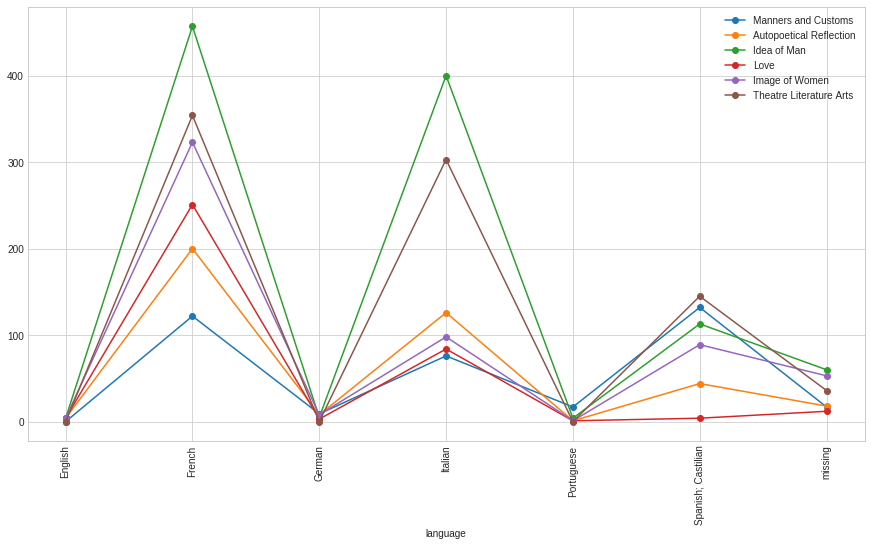

In [180]:
topics_language=texts_changes.groupby('language').sum()
ax = topics_language.drop('date',axis=1) \
    .plot(figsize=(15,8),marker='o')
ax.set_xticks(range(len(topics_language.index)))
ax.set_xticklabels(topics_language.index, rotation=90)

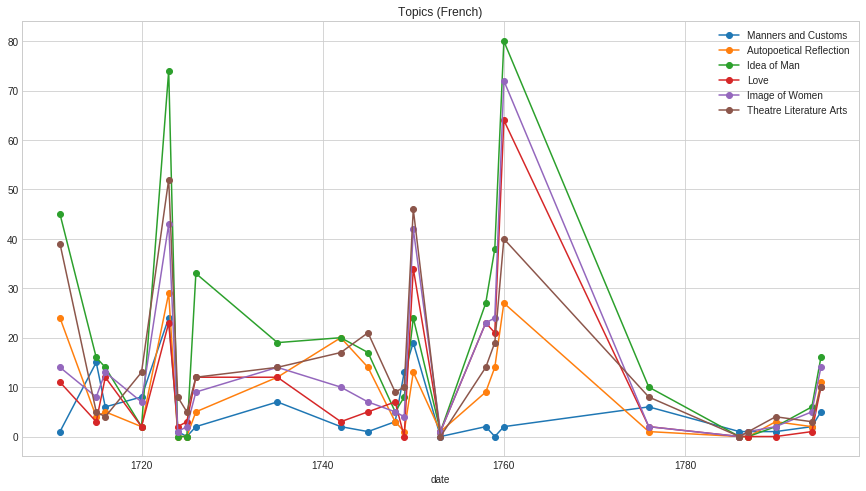

In [182]:
topics_year_language=texts_changes.loc[texts_corrected.language=='French'].groupby('date').sum()
ax = topics_year_language.plot(figsize=(15,8),marker='o',title='Topics (French)')

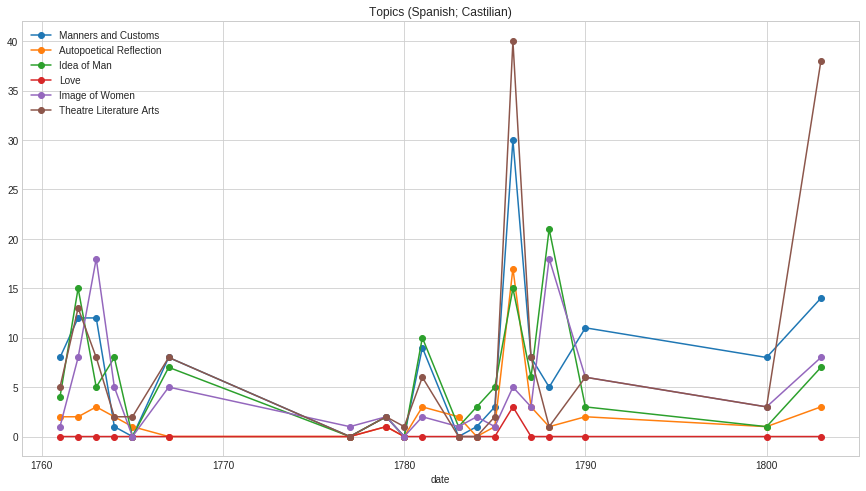

In [186]:
topics_year_language=texts_changes.loc[texts_corrected.language=='Spanish; Castilian'].groupby('date').sum()
ax = topics_year_language.plot(figsize=(15,8),marker='o',title='Topics (Spanish; Castilian)')

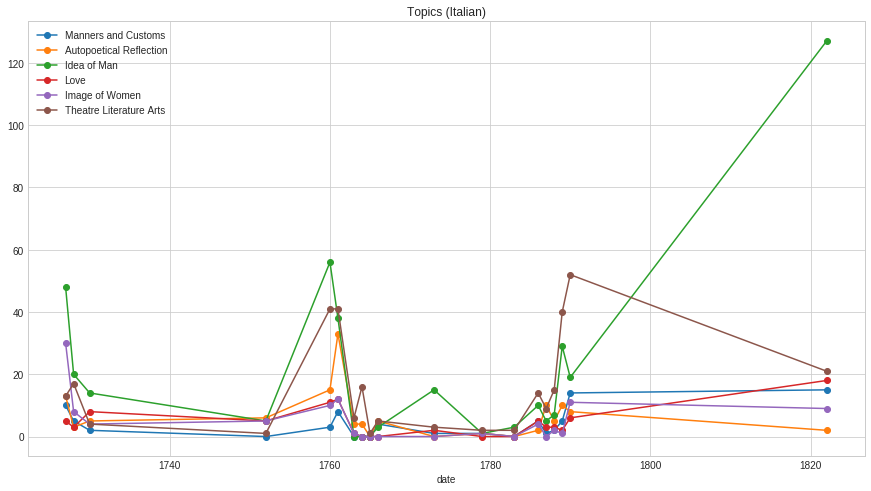

In [183]:
topics_year_language=texts_changes.loc[texts_corrected.language=='Italian'].groupby('date').sum()
ax = topics_year_language.plot(figsize=(15,8),marker='o',title='Topics (Italian)')